<a href="https://colab.research.google.com/github/raghuramakrishnan71/python_ml_examples/blob/main/diabetes_data_modeling_glm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
################################# Required packages ############################
# To work with dataframes
import pandas as pd 

# To perform numerical operations
import numpy as np

# To draw graphs
import matplotlib.pyplot as plt

# To visualize data
import seaborn as sns

# importing the library of KNN
from sklearn.neighbors import KNeighborsClassifier  

# To partition the data
from sklearn.model_selection import train_test_split

# Importing performance metrics - accuracy score & confusion matrix
from sklearn import metrics

# To generate ROC curve
from sklearn.metrics import roc_curve

# To calculate AUC score
from sklearn.metrics import roc_auc_score

# importing library of binary classifier
import statsmodels.api as sm

# To calculate confusion matrix
from sklearn.metrics import confusion_matrix

# Complete sklearn
import sklearn

# Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# LinearDiscriminant analysis classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Support vector machine classifier
from sklearn import svm

# To perform mathematical operations
import math

# To findout correlation
from scipy.stats import kendalltau

# binary classifier
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
# path
dataset_path = "/content/drive/MyDrive/sample_datasets/"

# Reading data
diabetes_df = pd.read_csv(dataset_path + "diabetes_data.csv")

#**** To check variables' data type
#print(df.info())

#**** Check for missing values.            
diabetes_df.isnull()          

#**** How many rows contain missing values? 
#print('Data columns with null values:\n', df.isnull().sum())

diabetes_df_copy1 = diabetes_df.copy()

# Storing the column names 
columns_list=list(diabetes_df_copy1.columns)
print(columns_list)

#drop unwanted columns
diabetes_df_copy2 = diabetes_df_copy1.copy()
#as_df_copy2 = as_df_copy1.drop(columns =['S__No_n', 'State', 'District', 'location', 'Lat', 'log', 'Tp_Slt', 'Source'], axis = 1)

#create a categorical variable for Arsenic. If As < 10, then 1 else 0
diabetes_df_copy2['Diabetes_cat'] = diabetes_df_copy2['Diabetes'].map({'Yes': 1, 'No': 0})

print(diabetes_df_copy2.head(5))
print('Shape of new dataframe (diabetes_df_copy2): ', diabetes_df_copy2.shape, type(diabetes_df_copy2))


['Blood Sugar Level', 'Diabetes']
   Blood Sugar Level Diabetes  Diabetes_cat
0                148      Yes             1
1                 85       No             0
2                183      Yes             1
3                 89       No             0
4                137      Yes             1
Shape of new dataframe (diabetes_df_copy2):  (768, 3) <class 'pandas.core.frame.DataFrame'>


In [6]:
n = len(diabetes_df_copy2)
print('Dataset size: ', n)

sturges_m = 1 + 3.322 * math.log(n)
rice_m = (n ** (1. / 3)) * 2

print('Sturges bin size: ', math.floor(sturges_m))
print('Rice bin size: ', rice_m)

no_of_bins = math.floor(rice_m)
print('No of bins: ', no_of_bins)

Dataset size:  768
Sturges bin size:  23
Rice bin size:  18.315427880853306
No of bins:  18


In [7]:
threshold = 10

diabetes_df_copy3 = diabetes_df_copy2.copy()
#df_copy3['india_geol'] = df_copy3['india_geol'].astype('category',copy=False)

# Perform dummy encoding on the categorical columns of data
#df_copy4 = pd.get_dummies(df_copy3)
diabetes_df_copy4 = diabetes_df_copy3.copy()

#**** To recheck variables' data type
print(diabetes_df_copy4.info())

print('Columns: ', diabetes_df_copy4.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Blood Sugar Level  768 non-null    int64 
 1   Diabetes           768 non-null    object
 2   Diabetes_cat       768 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 18.1+ KB
None
Columns:  Index(['Blood Sugar Level', 'Diabetes', 'Diabetes_cat'], dtype='object')


**Graphs**

In [8]:
# Storing the output values in y

#Diabetes
diabetes = diabetes_df_copy3['Diabetes_cat'].values
print('Diabetes_cat rows with null values: ', diabetes_df_copy3['Diabetes_cat'].isnull().sum())

x = np.array(diabetes)
print('Unique classes:', np.unique(x))

Diabetes_cat rows with null values:  0
Unique classes: [0 1]


**Split into training and test datasets**

In [9]:
# Storing the column names 
columns_list = list(diabetes_df_copy3.columns)
print('List of columns:', columns_list)

features=list(['Blood Sugar Level'])
print('Features: ', features)

# Storing the output values in y
y = diabetes_df_copy3['Diabetes_cat'].values
#print(y)

# Storing the values from input features
x = diabetes_df_copy3[features].values
#print(x)

# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

#x_train_reshaped = x_train.reshape(-1, 1) # reshape to a 1D array

#x_test_reshaped = x_test.reshape(-1, 1) # reshape to a 1D array

#print("x_train_reshaped shape:", x_train_reshaped.shape, " x_test_reshaped shape", x_test_reshaped.shape)

List of columns: ['Blood Sugar Level', 'Diabetes', 'Diabetes_cat']
Features:  ['Blood Sugar Level']


**Build a binary classification model**

References:

1. https://www.analyticsvidhya.com/blog/2021/06/classification-problem-relation-between-sensitivity-specificity-and-accuracy/


In [10]:
# =============================================================================
# binary classification model
# =============================================================================

#check the version of sklearn
print(sklearn.__version__)

# define the model
# parameters n_estimators, max_depth, learning_rate, max_features, 
x_train_sm = sm.add_constant(x_train)
SM_classifier = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())

print('y_train shape:', y_train.shape)
print('x_train_sm shape:', x_train_sm.shape)

# Fitting the values for X and Y
res = SM_classifier.fit()
print(res.summary())

# Predicting the test values with model, the output is not y_predicted
y_pred_prob = res.predict(x_train_sm)
y_predicted = y_pred_prob.copy()

# convert the probablities into classes
for irow in range(len(y_pred_prob)):
  if (y_pred_prob[irow] <= 0.5):
    y_predicted[irow] = 0
  else:
    y_predicted[irow] = 1

print('Classes predicted: ', np.unique(y_predicted))
print('Total predictions: ', len(y_predicted))
print('Actual count of diabetes=0 [0,2]: ', np.count_nonzero(y_test == 0), '| diabetes=1 [1,2]: ', np.count_nonzero(y_test == 1))
print('Predicted count of diabetes=0 [2,0]: ', np.count_nonzero(y_predicted == 0), '| diabetes=0 [2,1]: ', np.count_nonzero(y_predicted == 1))

# Confusion matrix
# Ci,j is equal to the number of observations known to be in group  and predicted to be in group j.
###############################################
#               Pred+(0)     Pred-(1)
# Actual+(0)    TN           FP       TActual+(0)
# Actual-(1)    FN*          TP       TActual-(1)
#               TPred+       TPred-
#
# FN = falsely predicted negative
# FP = falsely predicted positive
# 0 is negative, 1 is positive
###############################################

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

# Need to convert y_train from probabilities to 0 or 1
cm = metrics.confusion_matrix(y_train, y_predicted)
print(cm)

# Calculating the accuracy
acc_score = metrics.accuracy_score(y_train, y_predicted)
print("Accuracy: ", round(acc_score, 3))
print("Precision: ", round(metrics.precision_score(y_train, y_predicted), 3))
print("Sensitivity or recall using function:", round(metrics.recall_score(y_train, y_predicted), 3))

# sensitivity = TP/(TP + FN)
sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
print('Sensitivity or recall using confusion matrix: ', round(sensitivity, 3))

# specificity = TN/(TN + FP)
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity using confusion matrix: ', round(specificity, 3))

# Printing the misclassified values from prediction
print('Misclassified samples: %d' % (y_train != y_predicted).sum())

0.22.2.post1
y_train shape: (537,)
x_train_sm shape: (537, 2)
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  537
Model:                            GLM   Df Residuals:                      535
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -279.47
Date:                Sat, 09 Oct 2021   Deviance:                       558.94
Time:                        07:18:19   Pearson chi2:                 1.01e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

AUC score for GLM classifier:  0.8027578304048892


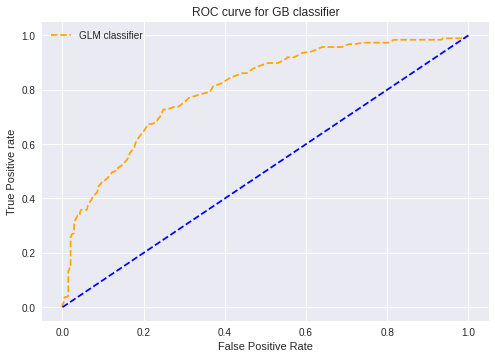

[[1, 0.6120227826508906, 1.0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], [0, 0.45538363709488267, 0.0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [1, 0.40677700335423866, 0.0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [1, 0.3508416138980204, 0.0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0.21589023420210285, 0.0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0.24396039950374945, 0.0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0.6025616414600314, 1.0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], [0, 0.0037792703563152, 0.0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0.28237240086285526, 0.0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0.23671752801991397, 0.0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0.378405036518038, 0.0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 0.740950452801617, 1.0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], [1, 0.7093487785911698, 1.0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], [0, 0.3242386507762252, 0.0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [0, 0.5640115671024828, 1.0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [0, 0.274403033278873, 0.0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0.7839695858345573, 1.0, 1, 1, 1

In [11]:
# =============================================================================
# ROC curve
# =============================================================================

# predict probabilities of each X_test, this not required
#print(y_pred_prob)

fpr1, tpr1, thresh1 = roc_curve(y_train, y_pred_prob, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_train))]
p_fpr, p_tpr, _ = roc_curve(y_train, random_probs, pos_label=1)

# auc scores
auc_score = roc_auc_score(y_train, y_pred_prob)
print('AUC score for GLM classifier: ', auc_score)

plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='GLM classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve for GB classifier')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig(dataset_path + 'ROC_GLM_classifier', dpi=300)
plt.show();

# =============================================================================
# Specificity, sensitivity, and accuracy curve
# =============================================================================

numbers = [float(x)/10 for x in range(10)]
#print(numbers)
y_predicted_at_cutoffs = []

#x = np.array(y_pred_prob)
#print('Unique probabilities:', np.unique(x))

for irow in range(len(y_pred_prob)):
  v = [y_train[irow], y_pred_prob[irow], y_predicted[irow]]
  for cutof_prob in numbers:
    if (y_pred_prob[irow] <= cutof_prob): # non-diabetic
      v.append(0)
    else:
      v.append(1)
  y_predicted_at_cutoffs.append(v)

print(y_predicted_at_cutoffs)

# How many 0 and 1 using cuttof of 0.5?
class0, class1 = 0, 0
for irow in range(len(y_pred_prob)):
  if (y_pred_prob[irow] <= 0.5):
    class0 += 1
  else:
    class1 += 1
print("Verification check: At 0.5 cutoff, predicted Class0 (No Diabetes): " + str(class0) + " Class1 (Diabetes):" + str(class1))

#print(pred_prob_y)
#print(y_predicted)


   y_train  y_pred_prob  y_predicted  0.0  0.1  ...  0.5  0.6  0.7  0.8  0.9
0        1     0.612023          1.0    1    1  ...    1    1    0    0    0
1        0     0.455384          0.0    1    1  ...    0    0    0    0    0
2        1     0.406777          0.0    1    1  ...    0    0    0    0    0
3        1     0.350842          0.0    1    1  ...    0    0    0    0    0
4        0     0.215890          0.0    1    1  ...    0    0    0    0    0
5        1     0.243960          0.0    1    1  ...    0    0    0    0    0
6        1     0.602562          1.0    1    1  ...    1    1    0    0    0
7        0     0.003779          0.0    1    0  ...    0    0    0    0    0
8        0     0.282372          0.0    1    1  ...    0    0    0    0    0
9        0     0.236718          0.0    1    1  ...    0    0    0    0    0

[10 rows x 13 columns]
Verification step: i, Specificity/Senstivity/Accuracy: 0.5 0.883 0.487 0.745


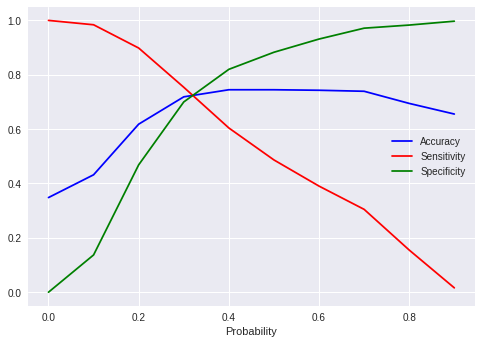

     Probability  Accuracy  Sensitivity  Specificity
0.0          0.0  0.348231     1.000000     0.000000
0.1          0.1  0.432030     0.983957     0.137143
0.2          0.2  0.618250     0.898396     0.468571
0.3          0.3  0.718808     0.754011     0.700000
0.4          0.4  0.744879     0.604278     0.820000
0.5          0.5  0.744879     0.486631     0.882857
0.6          0.6  0.743017     0.390374     0.931429
0.7          0.7  0.739292     0.304813     0.971429
0.8          0.8  0.694600     0.155080     0.982857
0.9          0.9  0.655493     0.016043     0.997143


In [12]:
y_predicted_at_cutoffs_df = pd.DataFrame(y_predicted_at_cutoffs, columns = ['y_train','y_pred_prob','y_predicted'] + numbers)
print(y_predicted_at_cutoffs_df.head(10))

cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity'])

for icols in numbers:
    cm1 = metrics.confusion_matrix(y_predicted_at_cutoffs_df['y_train'], y_predicted_at_cutoffs_df[icols])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[icols] =[icols, accuracy, sensitivity, specificity]
    
    # calculate the cutoff, and the accuracy, senstivity,and specificity at the cutoff.    
    if (icols == 0.5):
      print('Verification step: i, Specificity/Senstivity/Accuracy:', icols, round(specificity, 3), round(sensitivity, 3), round(accuracy, 3))


# gca stands for 'get current axis'
ax = plt.gca()

cutoff_df.plot(kind='line',x='Probability',y='Accuracy', color='blue', ax=ax)
cutoff_df.plot(kind='line',x='Probability',y='Sensitivity', color='red', ax=ax)
cutoff_df.plot(kind='line',x='Probability',y='Specificity', color='green', ax=ax)

plt.show()

print(cutoff_df)



